<a href="https://colab.research.google.com/github/gorzanskik-ai/titanic/blob/main/models_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from google.colab import drive
drive.mount('/content/drive')
path_train = '/content/drive/MyDrive/machine learning/projects/titanic/train2.csv'
path_test = '/content/drive/MyDrive/machine learning/projects/titanic/test2.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score

In [59]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

X_train = train.drop("Survived", axis=1).to_numpy()
y_train = train["Survived"].to_numpy()
X_test  = test.to_numpy()

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic regression

In [61]:
lr = LogisticRegression()

lr_scores = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print(lr_scores)
print(f'mean: {round(lr_scores.mean() * 100, 2)} %')
print(f'std: {round(lr_scores.std() * 100, 2)} %')

[0.81111111 0.79775281 0.76404494 0.87640449 0.80898876 0.7752809
 0.79775281 0.82022472 0.82022472 0.80898876]
mean: 80.81 %
std: 2.86 %


KNeighbors

In [62]:
kn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 15),
          'weights': ['uniform', 'distance'],
          'metric': ['euclidean', 'manhattan', 'minkowski']}

grid_search = GridSearchCV(estimator=kn, param_grid=params, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}

In [63]:
kn = KNeighborsClassifier(n_neighbors= 9, weights= 'uniform', metric='manhattan')
kn_scores = cross_val_score(estimator=kn, X=X_train, y=y_train, cv=10)
print(kn_scores)
print(f'mean: {round(kn_scores.mean() * 100, 2)} %')
print(f'std: {round(kn_scores.std() * 100, 2)} %')

[0.8        0.87640449 0.76404494 0.88764045 0.88764045 0.83146067
 0.80898876 0.79775281 0.87640449 0.83146067]
mean: 83.62 %
std: 4.16 %


Decision tree

In [64]:
dt = DecisionTreeClassifier()
params = {'max_depth': np.arange(1, 7),
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1, 5, 10, 25, 50, 70],
          'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35]}

grid_search = GridSearchCV(estimator=dt, param_grid=params, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [65]:
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_leaf=1, min_samples_split=2)
dt_scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10)
print(dt_scores)
print(f'mean: {round(dt_scores.mean() * 100, 2)} %')
print(f'std: {round(dt_scores.std() * 100, 2)} %')

[0.83333333 0.87640449 0.7752809  0.87640449 0.84269663 0.80898876
 0.80898876 0.78651685 0.85393258 0.85393258]
mean: 83.16 %
std: 3.37 %


Random forest

In [66]:
rf = RandomForestClassifier()
params = {'max_depth': np.arange(1, 7),
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [1, 5, 10],
          'min_samples_split': [2, 4, 10, 12],
          'n_estimators': [100, 200, 300]}

grid_search = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [69]:
rf = RandomForestClassifier(max_depth=6, criterion='entropy', min_samples_leaf=1, min_samples_split=4, n_estimators=100)
rf_scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
print(rf_scores)
print(f'mean: {round(rf_scores.mean() * 100, 2)} %')
print(f'std: {round(rf_scores.std() * 100, 2)} %')

[0.81111111 0.86516854 0.7752809  0.83146067 0.87640449 0.79775281
 0.84269663 0.78651685 0.86516854 0.84269663]
mean: 82.94 %
std: 3.35 %


SVM

In [71]:
svc = SVC()
params = {'C': [0.1,1, 10, 100],
          'gamma': [1, 0.1 ,0.01 ,0.001],
          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svc, param_grid=params, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [72]:
svc = SVC(C=100, gamma=0.01, kernel='rbf')
svc_scores = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10)
print(svc_scores)
print(f'mean: {round(svc_scores.mean() * 100, 2)} %')
print(f'std: {round(svc_scores.std() * 100, 2)} %')

[0.81111111 0.85393258 0.76404494 0.87640449 0.87640449 0.78651685
 0.80898876 0.7752809  0.85393258 0.83146067]
mean: 82.38 %
std: 3.89 %


Naive Bayes

In [73]:
nb = GaussianNB()
nb_scores = cross_val_score(estimator=nb, X=X_train, y=y_train, cv=10)
print(svc_scores)
print(f'mean: {round(nb_scores.mean() * 100, 2)} %')
print(f'std: {round(nb_scores.std() * 100, 2)} %')

[0.81111111 0.85393258 0.76404494 0.87640449 0.87640449 0.78651685
 0.80898876 0.7752809  0.85393258 0.83146067]
mean: 77.34 %
std: 3.8 %


Results

,mean_accuracy,+- std,range
KNeighbors,83.62,4.16,[79.46 - 87.78]
Decision Tree,83.16,3.37,[79.79 - 86.53]
Random Forest,82.94,3.35,[79.59 - 86.29]
SVC,82.38,3.89,[78.49 - 86.27]
Linear Regression,80.81,2.86,[77.95 - 83.67]
Naive Bayes,77.34,3.80,[73.54 - 81.14]


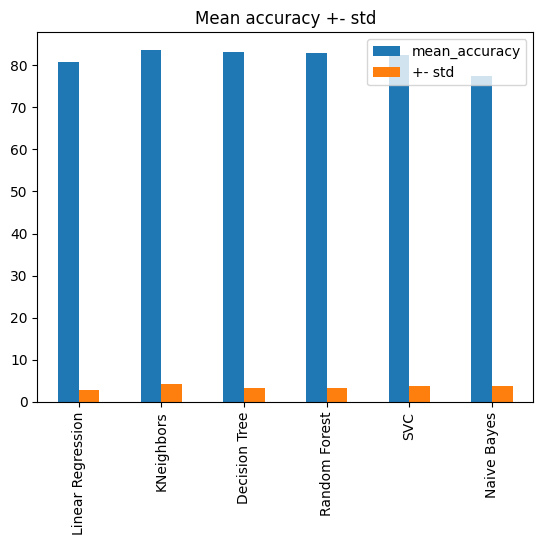

In [92]:
means = []
stds = []
ranges = []
for i in [lr_scores, kn_scores, dt_scores, rf_scores, svc_scores, nb_scores]:
    mean = round(i.mean() * 100, 2)
    std = round(i.std() * 100, 2)
    means.append(mean)
    stds.append(std)
    ranges.append(f'[{round(mean - std, 2)} - {round(mean + std, 2)}]')

models = ['Linear Regression', 'KNeighbors', 'Decision Tree', 'Random Forest', 'SVC', 'Naive Bayes']
results = pd.DataFrame({'mean_accuracy': means, '+- std': stds, 'range': ranges}, index=models)


results.plot.bar()
plt.title('Mean accuracy +- std')

results.sort_values(by=['mean_accuracy'], ascending=False)